<a href="https://colab.research.google.com/github/mardzyuba/Faker/blob/master/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1840]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Скачиваем только файлы train.csv.zip, macro.csv.zip.

Произведем загрузку данных и получим информацию о датафреймах.

---



In [1841]:
macro = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/macro.csv')
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,...,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,42.9600,80.59,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [1842]:
macro.shape

(2484, 100)

Прежде чем производить соединение двух датафреймов, проработаю каждый из них - выявлю неинформативные колонки(от 40% пропусков) и удалю их.


In [1843]:
for col in macro.columns:
  print('{}: {}%'.format(col, round(np.mean(macro[col].isnull())*100)))

timestamp: 0%
oil_urals: 0%
gdp_quart: 4%
gdp_quart_growth: 4%
cpi: 1%
ppi: 1%
gdp_deflator: 15%
balance_trade: 1%
balance_trade_growth: 4%
usdrub: 0%
eurrub: 0%
brent: 0%
net_capital_export: 16%
gdp_annual: 0%
gdp_annual_growth: 0%
average_provision_of_build_contract: 0%
average_provision_of_build_contract_moscow: 15%
rts: 0%
micex: 0%
micex_rgbi_tr: 0%
micex_cbi_tr: 0%
deposits_value: 0%
deposits_growth: 1%
deposits_rate: 17%
mortgage_value: 0%
mortgage_growth: 15%
mortgage_rate: 0%
grp: 26%
grp_growth: 41%
income_per_cap: 12%
real_dispos_income_per_cap_growth: 26%
salary: 12%
salary_growth: 26%
fixed_basket: 0%
retail_trade_turnover: 12%
retail_trade_turnover_per_cap: 12%
retail_trade_turnover_growth: 12%
labor_force: 12%
unemployment: 12%
employment: 12%
invest_fixed_capital_per_cap: 12%
invest_fixed_assets: 12%
profitable_enterpr_share: 26%
unprofitable_enterpr_share: 26%
share_own_revenues: 26%
overdue_wages_per_cap: 26%
fin_res_per_cap: 26%
marriages_per_1000_cap: 26%
divorce_ra

In [1844]:
macro = macro.drop(['load_of_teachers_preschool_per_teacher','modern_education_share','old_education_build_share','hospital_beds_available_per_cap'], axis = 1)
macro = macro.drop(['hospital_bed_occupancy_per_year','provision_retail_space_sqm','provision_retail_space_modern_sqm','theaters_viewers_per_1000_cap'], axis = 1)
macro = macro.drop(['museum_visitis_per_100_cap','population_reg_sports_share','students_reg_sports_share'], axis = 1)

In [1845]:
macro = macro.drop(['grp_growth'],axis = 1)

In [1846]:
macro.shape

(2484, 88)

Второй датафрейм train.

In [1847]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [1848]:
train.shape

(30471, 292)

In [1849]:
for col in train.columns:
  print('{}: {}%'.format(col, round(np.mean(train[col].isnull())*100)))

id: 0%
timestamp: 0%
full_sq: 0%
life_sq: 21%
floor: 1%
max_floor: 31%
material: 31%
build_year: 45%
num_room: 31%
kitch_sq: 31%
state: 44%
product_type: 0%
sub_area: 0%
area_m: 0%
raion_popul: 0%
green_zone_part: 0%
indust_part: 0%
children_preschool: 0%
preschool_quota: 22%
preschool_education_centers_raion: 0%
children_school: 0%
school_quota: 22%
school_education_centers_raion: 0%
school_education_centers_top_20_raion: 0%
hospital_beds_raion: 47%
healthcare_centers_raion: 0%
university_top_20_raion: 0%
sport_objects_raion: 0%
additional_education_raion: 0%
culture_objects_top_25: 0%
culture_objects_top_25_raion: 0%
shopping_centers_raion: 0%
office_raion: 0%
thermal_power_plant_raion: 0%
incineration_raion: 0%
oil_chemistry_raion: 0%
radiation_raion: 0%
railroad_terminal_raion: 0%
big_market_raion: 0%
nuclear_reactor_raion: 0%
detention_facility_raion: 0%
full_all: 0%
male_f: 0%
female_f: 0%
young_all: 0%
young_male: 0%
young_female: 0%
work_all: 0%
work_male: 0%
work_female: 0%
ek

cafe_sum_500_min_price_avg: 44%
cafe_sum_500_max_price_avg: 44%
cafe_avg_price_500: 44%
hospital_beds_raion: 47%


In [1850]:
train = train.drop(['cafe_sum_500_min_price_avg','cafe_sum_500_max_price_avg','cafe_avg_price_500','hospital_beds_raion'], axis = 1)

In [1851]:
train.shape

(30471, 288)

# **Произведем объединение данных в один датафрейм.**

---



In [1852]:
macro['timestamp'] = pd.to_datetime(macro['timestamp'])
train['timestamp'] = pd.to_datetime(train['timestamp'])
df = train.merge(macro, on = 'timestamp', how = 'inner')

Производим чистку данных (пропуски данных, неинформативные признаки, 
аномалии, оцифровка текстовых столбцов и т.п.)


---



In [1853]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 30470
Data columns (total 375 columns):
 #   Column                                      Dtype         
---  ------                                      -----         
 0   id                                          int64         
 1   timestamp                                   datetime64[ns]
 2   full_sq                                     int64         
 3   life_sq                                     float64       
 4   floor                                       float64       
 5   max_floor                                   float64       
 6   material                                    float64       
 7   build_year                                  float64       
 8   num_room                                    float64       
 9   kitch_sq                                    float64       
 10  state                                       float64       
 11  product_type                                object   

In [1854]:
pd.set_option('display.max_rows', 1000)
df.isna().mean().sort_values(ascending = False)

build_year                                    0.446490
state                                         0.444980
material                                      0.314135
max_floor                                     0.314135
num_room                                      0.314135
kitch_sq                                      0.314135
preschool_quota                               0.219487
school_quota                                  0.219389
cafe_sum_1000_min_price_avg                   0.214105
cafe_sum_1000_max_price_avg                   0.214105
cafe_avg_price_1000                           0.214105
life_sq                                       0.209478
build_count_1971-1995                         0.163795
build_count_1921-1945                         0.163795
build_count_1946-1970                         0.163795
build_count_monolith                          0.163795
build_count_after_1995                        0.163795
raion_build_count_with_builddate_info         0.163795
build_coun

Создадим массив данных из колонок, содержащих в названии ID элементы и удалим их из нашего датафрейма.

In [1855]:
id_mas = ['id']
for i in df.columns:
  if i[:2] == 'ID':
    id_mas.append(i)

In [1856]:
df = df.drop(id_mas, axis=1)

Удалим дубликаты строк.

In [1857]:
df.duplicated().sum()

10

In [1858]:
df = df.drop_duplicates()

Проверим пропуски в target.

In [1859]:
df['price_doc'].isna().sum()

0

Оценим данные по показателям площади, которые влияют на нашу целевую переменную.

full_sq: общая площадь в квадратных метрах, включая лоджии, балконы и другие нежилые помещения

life_sq: жилая площадь в квадратных метрах, без учета лоджий, балконов и других нежилых помещений

kitch_sq: кухонная зона


---



In [1860]:
df[['full_sq', 'life_sq', 'kitch_sq']].isnull().sum()

full_sq        0
life_sq     6376
kitch_sq    9567
dtype: int64

In [1861]:
df[['full_sq', 'life_sq', 'kitch_sq']].describe()

,full_sq,life_sq,kitch_sq
count,30461.000000,24085.000000,20894.000000
mean,54.211877,34.399128,6.398535
std,38.034562,52.285018,28.268262
min,0.000000,0.000000,0.000000
25%,38.000000,20.000000,1.000000
50%,49.000000,30.000000,6.000000
75%,63.000000,43.000000,9.000000
max,5326.000000,7478.000000,2014.000000


In [1862]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,provision_doctors,provision_nurse,load_on_doctors,power_clinics,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,...,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,#!,1391.710938,89.0495,65.9,99.6,8180.755454,375.8,6943.0,0.45356,269768.0,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,76284,...,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,#!,1391.710938,89.0495,65.9,99.6,8180.755454,375.8,6943.0,0.45356,269768.0,23587.0,230310.0
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,no,101982,...,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,#!,1391.710938,89.0495,65.9,99.6,8180.755454,375.8,6943.0,0.45356,269768.0,23587.0,230310.0
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,no,21155,...,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,#!,1391.710938,89.0495,65.9,99.6,8180.755454,375.8,6943.0,0.45356,269768.0,23587.0,230310.0
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,no,28179,...,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,#!,1391.710938,89.0495,65.9,99.6,8180.755454,375.8,6943.0,0.45356,269768.0,23587.0,230310.0


# Заполним значения Нан.

Предположим, 

0 < кухня < жилой

кухня < жилая < общей

a < общая <= P

Площадь не может быть 0, заменим на Нан, чтобы исключить отрицательную корреляцию.

In [1863]:
df[['life_sq','full_sq', 'kitch_sq']]=df[['life_sq','full_sq','kitch_sq']].replace(0, np.nan)

In [1864]:
df[['full_sq', 'life_sq', 'kitch_sq']].isnull().sum()

full_sq         2
life_sq      6421
kitch_sq    10947
dtype: int64

Выявим сколько значений full было меньше life,kitch и заменим их на нан для дальнейшей корректировки.

In [1865]:
df['full_sq'] = np.where(df['life_sq'] > df['full_sq'], np.nan, df['full_sq'])
df['full_sq'] = np.where(df['kitch_sq'] > df['full_sq'], np.nan, df['full_sq'])

In [1866]:
df[['full_sq', 'life_sq', 'kitch_sq']].isnull().sum()

full_sq        50
life_sq      6421
kitch_sq    10947
dtype: int64

In [1867]:
df['full_sq'] = np.where(df['full_sq'].isna(), (df['life_sq'] + df['kitch_sq'] + (df['kitch_sq']*1/2)), df['full_sq'])

Предположим, что (df['kitch_sq']*1/2) - это половина от площади кухни на балкон и ванную(примерно).

Если кухня = Нан, значит приравняем full и life.

In [1868]:
df['full_sq'] = np.where(df['full_sq'].isna(), df['life_sq'], df['full_sq'])

In [1869]:
df[['full_sq', 'life_sq', 'kitch_sq']].isnull().sum()

full_sq         1
life_sq      6421
kitch_sq    10947
dtype: int64

Оставшуюся  строку, я удалю, т.к. если она не расчиталась, значит данных по др. площадям в этих строках нет.(неинформативно)

In [1870]:
df = df.dropna(axis = 'index', how = 'any', subset = ['full_sq'])

In [1871]:
df[['full_sq', 'life_sq', 'kitch_sq']].isnull().sum()

full_sq         0
life_sq      6420
kitch_sq    10946
dtype: int64

Заполним данные в life_sq.

Также, заменим значения в life, если они больше full и меньше kitchen.

In [1872]:
df['life_sq'] = np.where(df['life_sq'] > df['full_sq'], np.nan, df['life_sq'])
df['life_sq'] = np.where(df['life_sq'] < df['kitch_sq'], np.nan, df['life_sq'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1873]:
df[['full_sq', 'life_sq', 'kitch_sq']].isnull().sum()

full_sq         0
life_sq      6469
kitch_sq    10946
dtype: int64

Вычтем из общей - кухню и часть на "другое"(ванна/балкон)

In [1874]:
df['life_sq'] = np.where(df['life_sq'].isna(), (df['full_sq'] -df['kitch_sq'] - (df['full_sq']*0.7)), df['life_sq'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Если кухня Нан, посчитаем площадь от жилой, учтем ванную и балкон(сделаем долю жилой 0,7 от общей).

In [1875]:
df['life_sq'] = np.where(df['life_sq'].isna(), (df['full_sq']*0.7), df['life_sq'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1876]:
df[['full_sq', 'life_sq', 'kitch_sq']].isnull().sum()

full_sq         0
life_sq         0
kitch_sq    10946
dtype: int64

Проработаем значения kitch.

In [1877]:
df['kitch_sq'] = np.where(df['kitch_sq'] > df['full_sq'], np.nan, df['kitch_sq'])
df['kitch_sq'] = np.where(df['kitch_sq'] > df['life_sq'], np.nan, df['kitch_sq'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


У нас есть значения, где общая = жилой, поэтому кухню будем искать из жилой.

Предположим,что кухня занимает долю от общей(0,2), тк жилая у нас 0,7, а на другое оставим 0,1 и вычтем это.

In [1878]:
df['kitch_sq'] = np.where(df['kitch_sq'].isna(), (df['life_sq'] - ((df['full_sq']*0.1))), df['kitch_sq'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1879]:
df[['full_sq', 'life_sq', 'kitch_sq']].isnull().sum()

full_sq     0
life_sq     0
kitch_sq    0
dtype: int64

# Начнем работать над выбросами.

---



Остановимся на значениях, которые напрямую влияют на нашу целевую переменную - площадь квартиры.
Приведем данные по площади в информативный вид.

---



In [1880]:
df[['full_sq', 'life_sq', 'kitch_sq']].describe()

,full_sq,life_sq,kitch_sq
count,30460.000000,30460.000000,30460.000000
mean,55.027101,32.984580,15.110909
std,66.946324,49.126343,24.094786
min,1.000000,-1094.850000,-1401.200000
25%,38.000000,19.000000,5.000000
50%,50.000000,29.000000,9.000000
75%,63.000000,42.000000,22.700000
max,7479.500000,7478.000000,721.800000


Ищем квартили и удаляем значения, невходящие в нижний и верхний диапозон.

In [1881]:
min = df['full_sq'].quantile(0.02)
max = df['full_sq'].quantile(0.98)
df = df[df['full_sq'].between(min, max)] 

In [1882]:
min = df['kitch_sq'].quantile(0.02)
max = df['kitch_sq'].quantile(0.98)
print(min,max)
df = df[df['kitch_sq'].between(min, max)] 

1.0 55.8


In [1883]:
min = df['life_sq'].quantile(0.02)
max = df['life_sq'].quantile(0.98)
df = df[df['life_sq'].between(min, max)] 

In [1884]:
df[['full_sq', 'life_sq', 'kitch_sq']].describe()

,full_sq,life_sq,kitch_sq
count,27502.000000,27502.000000,27502.000000
mean,51.395262,30.723158,14.257330
std,15.790484,12.531801,12.769044
min,29.000000,10.100000,1.000000
25%,38.000000,19.000000,6.000000
50%,47.000000,29.000000,9.000000
75%,61.000000,40.000000,22.400000
max,113.000000,65.100000,55.800000


# Поработаем над типами данных в других колонках, выявим неинформативные(пропуски более 40%) и удалим их, заполним Нан медианной в оставшихся данных, подготовим категориальные данные.

In [1885]:
col_list = []
for col in df.columns:
  if df[col].isna().mean() >= 0.4:
    col_list.append(col)

col_list     

['build_year', 'state']

In [1886]:
df = df.drop(columns = col_list, axis = 1)

Просмотрим колонки с пропусками 0.3, есть ли смысл по информативности, заполнять их медианной.

In [1887]:
col_list_2 = []
for col in df.columns:
  if df[col].isna().mean() >= 0.3:
    col_list_2.append(col)

col_list_2

['max_floor', 'material', 'num_room']

Вывод такой, что заполнив медианной макс этажность, материал и количество жилых комнат - данные не будут соответствовать действительности.Плюс,количество жилых комнат на цену не влияет, нам нужна общая квадратура квартиры(есть двушки больше трешки и по цене, и по квадратуре).Удалим данные столбцы.

In [1888]:
df = df.drop(columns = col_list_2, axis = 1)

Просмотрев данные по head, многие данные в колонках однотипные.
Составим список признаков, у которых более 95% строк содержат одно и то же значение и определим, несут ли они полезную информацию.

In [1889]:
num_rows = len(df.index)
low_information_cols = [] 
for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 98.99644%
no     27226
yes      276
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.40753%
no     26514
yes      988
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.01113%
no     26680
yes      822
Name: nuclear_reactor_raion, dtype: int64

big_road1_1line: 97.65108%
no     26856
yes      646
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06930%
no     26696
yes      806
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.44746%
0    26800
1      657
2       36
3        9
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.46549%
0    27355
1      147
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.77485%
0    26340
1      941
2      127
3       42
4       34
5       12
6        5
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosque_count_1000: 98.13832%
0    26990
1      512
Name: mosque_count_1000, dtype: int64

mosque_count_1500: 96.22209%
0    26

Просмотрев данный список, я приняла решение об удалении данных колонок, информативность по отношению к нашей переменной слабая.

In [1890]:
df = df.drop(columns = low_information_cols, axis = 1)

Обработаем категориальные переменные.

child_on_acc_pre_school: Количество детей, ожидающих определения в дошкольные образовательные учреждения, при вместимости 100 
Я считаю, для данной колонки мало информации, всего лишь 4 уникальных - неинформативна, удаляю

In [1891]:
df=df.drop(columns = 'child_on_acc_pre_school', axis = 1)

In [1892]:
for columm in df.select_dtypes(include = 'object'):
        print(columm)
        print('n values', df[columm].nunique())
        print('----------------------------')
        print(df[columm].unique())
        print('----------------------------')

product_type
n values 2
----------------------------
['Investment' 'OwnerOccupier']
----------------------------
sub_area
n values 146
----------------------------
['Bibirevo' 'Nagatinskij Zaton' "Tekstil'shhiki" 'Mitino' 'Nizhegorodskoe'
 'Koptevo' 'Kuncevo' 'Kosino-Uhtomskoe' 'Zapadnoe Degunino' 'Presnenskoe'
 'Lefortovo' "Mar'ino" "Kuz'minki" 'Nagornoe' "Gol'janovo" 'Vnukovo'
 'Juzhnoe Tushino' 'Severnoe Tushino' "Chertanovo Central'noe"
 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino' 'Bogorodskoe'
 'Jaroslavskoe' 'Strogino' 'Hovrino' "Moskvorech'e-Saburovo"
 'Staroe Krjukovo' 'Ljublino' 'Veshnjaki' 'Danilovskoe' 'Caricyno'
 'Preobrazhenskoe' "Kon'kovo" 'Brateevo' 'Vostochnoe Izmajlovo'
 'Vyhino-Zhulebino' 'Donskoe' 'Novogireevo' 'Juzhnoe Butovo' 'Sokol'
 'Kurkino' 'Izmajlovo' 'Severnoe Medvedkovo' 'Rostokino'
 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe' 'Taganskoe'
 'Dmitrovskoe' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan' 'Basmannoe'
 'Babushkinskoe' 'Pokrovskoe Streshnevo' 'O

Заполним все колонки медианным значением,те значение, предугать которые сложно - после того, как заполнили пропуски в основных показателях(по площади).

In [1893]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isna()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: floor
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing missing values for: build_count_before_1920
imputing missing values for: build_count_1921-1945
imputing missing values for: build_count_1946-1970
imputing missing values for: build_count_1971-1995
imputing missing values for: build_count_after_1995
imputing missing values for: metro_min_walk
imputing missing value

Для категриальных значений.

In [1894]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isna()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] 
        df[col] = df[col].fillna(top)

# Произведем замену значений на бинарные:

culture_objects_top_25

thermal_power_plant_raion

incineration_raion

radiation_raion


big_market_raion


detention_facility_raion


water_1line

In [1895]:
bins = ['culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'radiation_raion', 'big_market_raion', 'detention_facility_raion', 'water_1line']
df[bins] = df[bins].applymap(lambda x : 1 if x == 'yes' else 0)

Заменим значения на числовые.

product_type

----------------------------
['Investment' 'OwnerOccupier']

ecology

----------------------------
['good' 'excellent' 'poor' 'satisfactory' 'no data']

In [1896]:
dic = {'Investment': 1, 'OwnerOccupier': 0}
df['product_type'] = df['product_type'].map(dic)

dic_2 = {'good': 4, 'excellent': 5, 'poor': 2, 'satisfactory': 3, 'no data': 0}
df['ecology'] = df['ecology'].map(dic_2)

In [1897]:
df['sub_area'].value_counts()

Poselenie Sosenskoe               1464
Nekrasovka                        1411
Poselenie Vnukovskoe              1207
Poselenie Moskovskij               810
Poselenie Voskresenskoe            669
Tverskoe                           560
Mitino                             552
Mar'ino                            498
Krjukovo                           453
Juzhnoe Butovo                     438
Poselenie Shherbinka               376
Zapadnoe Degunino                  364
Otradnoe                           347
Solncevo                           346
Poselenie Filimonkovskoe           346
Poselenie Desjonovskoe             319
Nagatinskij Zaton                  310
Ljublino                           293
Gol'janovo                         287
Bogorodskoe                        286
Tekstil'shhiki                     285
Severnoe Tushino                   262
Birjulevo Vostochnoe               262
Nagornoe                           262
Chertanovo Juzhnoe                 259
Vyhino-Zhulebino         

Создала списки с городами по округам, внесла их в числовом виде в наш датафрейм в качестве нового столбца.
Будем оценивать стоимость квартир по данному признаку.
Столбец с городами удаляю.

In [1898]:
novomosk_list = ['Poselenie Sosenskoe', 'Poselenie Vnukovskoe', 'Poselenie Moskovskij', 'Poselenie Voskresenskoe', 'Poselenie Shherbinka', 'Poselenie Filimonkovskoe','Poselenie Desjonovskoe', 'Poselenie Rjazanovskoe','Poselenie Mosrentgen', 'Poselenie Kokoshkino', 'Poselenie Marushkinskoe']

In [1899]:
yug_vos_list = ['Nekrasovka','Mar.ino','Ljublino','Ljublino','Tekstil.shhiki','Pechatniki','Rjazanskij','Lefortovo','Juzhnoportovoe','Kapotnja','Nizhegorodskoe']

In [1900]:
yug_zap_list = ['Juzhnoe Butovo','Zjuzino','Jasenevo','Kon.kovo','Gagarinskoe','Lomonovskoe', 'Akademicheskoe','Severnoe Butovo','Teplyj Stan','Cheremushki','Kotlovka']

In [1901]:
sever_list = ['Vojkovskoe', 'Levoberezhnoe','Vostochnoe Degunino','Savelovskoe','Sokol','Begovoe','Molzhaninovskoe','Zapadnoe Degunino','Golovinskoe','Koptevo','Beskudnikovskoe Hovrino Timirjazevskoe']

In [1902]:
zapad_list = ['Troparevo-Nikulino','Krylatskoe','Prospekt Vernadskogo','Dorogomilovo Vnukovo','Solncevo','Ochakovo-Matveevskoe','Ramenki','Mozhajskoe','Kuncevo','Novo-Peredelkino','Filevskij Park','Fili Davydkovo']

In [1903]:
yug_list = ['Nagatinskij Zaton', 'Birjulevo Vostochnoe',
'Chertanovo Juzhnoe',
'Orehovo-Borisovo Juzhnoe',
'Caricyno',
'Chertanovo Severnoe',
'Orehovo-Borisovo Severnoe',
'Chertanovo Central.noe',
'Brateevo',
'Danilovskoe',
'Nagatino-Sadovniki',
'Zjablikovo',
'Birjulevo Zapadnoe',
'Moskvorech.e-Saburovo']

In [1904]:
sev_zap_list = ['Severnoe Tushino', 
'Strogino',   
'Mitino',    
'Horoshevo-Mnevniki',  
'Juzhnoe Tushino',  
'Pokrovskoe Streshnevo',
'Shhukino',  
'Kurkino']

In [1905]:
vostok_list = ['Gol.janovo',  
'Bogorodskoe', 
'Izmajlovo',
'Kosino-Uhtomskoe',  
'Perovo',    
'Kuz.minki', 
'Veshnjaki', 
'Novogireevo', 
'Ivanovskoe',
'Sokolinaja Gora', 
'Severnoe Izmajlovo',
'Preobrazhenskoe', 
'Novokosino',   
'Vostochnoe Izmajlovo',  
'Sokol.niki',  
'Metrogorodok', 
'Vostochnoe']

In [1906]:
sev_vos_list = ['Losinoostrovskoe',
'Severnoe Medvedkovo', 
'Juzhnoe Medvedkovo',
'Lianozovo',
'Sviblovo',
'Jaroslavskoe', 
'Mar.ina Roshha', 
'Babushkinskoe', 
'Butyrskoe',  
'Alekseevskoe', 
'Marfino', 
'Ostankinskoe', 
'Altuf.evskoe', 
'Rostokino', 
'Severnoe', 
'Otradnoe', 
'Bibirevo']

In [1907]:
zel_grad_list = ['Krjukovo',  
'Matushkino',  
'Savelki',  
'Silino',   
'Staroe Krjukovo']

In [1908]:
centr_list = ['Basmannoe',   
'Meshhanskoe',  
'Hamovniki',    
'Jakimanka',    
'Zamoskvorech.e',  
'Krasnosel.skoe',
'Arbat',   
'Tverskoe', 
'Taganskoe', 
'Presnenskoe'] 

In [1909]:
troisck_list = ['Poselenie Novofedorovskoe',  
'Poselenie Pervomajskoe',  
'Poselenie Krasnopahorskoe', 
'Poselenie Voronovskoe', 
'Poselenie Shhapovskoe', 
'Poselenie Rogovskoe', 
'Poselenie Kievskij', 
'Poselenie Klenovskoe',  
'Poselenie Mihajlovo-Jarcevskoe']

Остальные:

Dmitrovskoe                        
Ajeroport  
Troickij okrug   
Horoshevskoe    
Donskoe
Nagornoe                           
Vyhino-Zhulebino                  

In [1910]:
df['sub_area'] = df['sub_area'].str.replace("'", ".")

In [1911]:
def func_okrug(x):
  if x in troisck_list:
    return 'Troitckii' 
  elif x in centr_list:
    return 'Central.nui'   
  elif x in zel_grad_list:
    return 'Zelenogradskii'   
  elif x in sev_vos_list:
    return 'Severo-Vostochnyi'   
  elif x in vostok_list:
    return  'Vostochnyi' 
  elif x in sev_zap_list:
    return 'Severo-Zapadnyi'    
  elif x in yug_list:
    return 'Yuzhnyi'   
  elif x in zapad_list:
    return 'Zapadnyi'  
  elif x in sever_list:
    return 'Severnyi'  
  elif x in yug_zap_list:
    return 'Yugo-Zapadnyi'   
  elif x in yug_vos_list:
    return 'Yugo-Vostochnyi'   
  elif x in novomosk_list:
    return 'Novomoskovskii'   
  else: return 'Other'

где 14 - это другие(остальные)

In [1912]:
df['sub_area_okrug'] = df['sub_area'].apply(func_okrug)

In [1913]:
df['sub_area_okrug'].value_counts()

Novomoskovskii       5262
Yugo-Vostochnyi      3203
Vostochnyi           2952
Yuzhnyi              2662
Severo-Vostochnyi    2141
Yugo-Zapadnyi        2003
Other                1970
Zapadnyi             1831
Severo-Zapadnyi      1792
Severnyi             1335
Central.nui          1268
Zelenogradskii        851
Troitckii             232
Name: sub_area_okrug, dtype: int64

In [1914]:
df = df.drop(columns = 'sub_area', axis = 1)

# Перейдем к наблюдениям, используя Exploratory Data Analysis.

Т.к. мы выстроили новые значения по full sq- найдем цену по квадратуре.

In [1915]:
df['price_per_sq'] = df['price_doc']/df['full_sq']

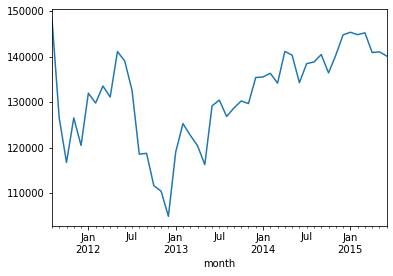

In [1916]:
df['month'] = df['timestamp'].dt.to_period('M')
agg = df.groupby('month')['price_per_sq'].mean()
agg.plot();

На графике мы неравномерное распределение, поэтому выведем переменную, чтобы нормировать нашу переменную.

In [1917]:
price_index = agg/agg[-1]

In [1918]:
dic = price_index.to_dict()
df['price_index'] = df['month'].map(dic)

In [1919]:
df['new_price_per'] = df['price_per_sq']/df['price_index']

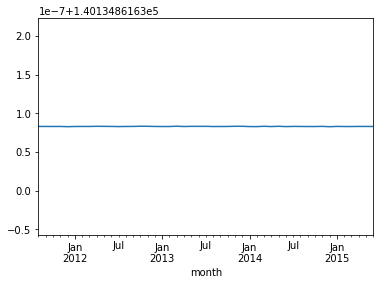

In [1920]:
df['month'] = df['timestamp'].dt.to_period('M')
agg = df.groupby('month')['new_price_per'].mean()
agg.plot();

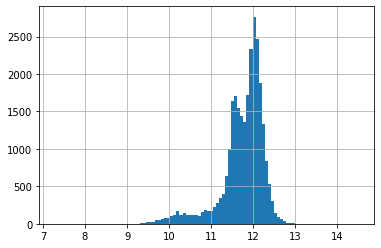

In [1921]:
np.log1p(df['new_price_per']).hist(bins = 100)

In [1922]:
df['target'] = np.log1p(df['new_price_per'])

In [1923]:
df = df.drop(columns=['month','price_doc','price_index','price_per_sq'],axis = 1)

Рассмотрим взаимосвязи нашей переменной с категориальными признаками(в нашем случае, это df['sub_area_okrug'] )

In [1924]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

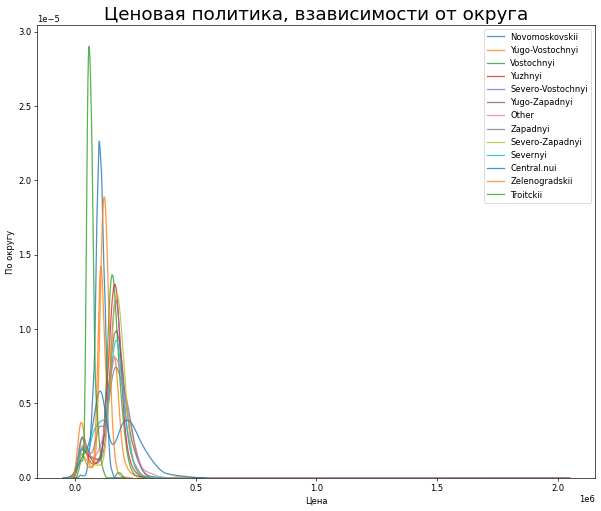

In [1925]:
plt.figure(figsize=(12,10), dpi= 60)

types = df.dropna(subset=['new_price_per'])
types = df['sub_area_okrug'].value_counts()
types = list(types[types.values > 100].index)

# Plot of distribution of scores for building categories


# Plot each building
for b_type in types:
    # Select the building type
    subset = df[df['sub_area_okrug'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['new_price_per'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Цена'); plt.ylabel('По округу'); 


# Decoration
plt.title('Ценовая политика, взависимости от округа', fontsize=22)
plt.legend()
plt.show()


По графику видно,что наша цена напрямую зависит от категориальной данной.

# Бинаризация.

Удалю колонки по населению по полу-тк признак постоянно меняющийся.

In [1926]:
df = df.drop(columns=['male_f', 'female_f','young_male', 'young_female', 'work_male', 'work_female'], axis = 1)

Проверим корреляцию признаков по населению.

In [1927]:
df_num = df[['raion_popul', 'full_all',	'young_all',	'work_all', 'ekder_all']]	

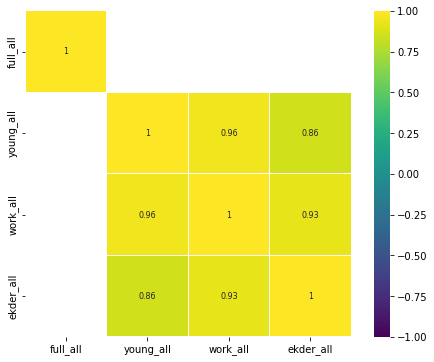

In [1928]:
corr = df_num.drop('raion_popul', axis=1).corr() 
plt.figure(figsize=(8, 6))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Мы видим,что все признаки сильно коррелируют друг с другом - оставим один, остальные удалим.

In [1929]:
df = df.drop(columns=['raion_popul', 'full_all',	'young_all',	'work_all', 'ekder_all'], axis = 1)	

In [1930]:
df = df.drop(columns=['ekder_male',	'ekder_female',	'0_6_all',	'0_6_male',	'0_6_female',	'7_14_all',	'7_14_male',	'7_14_female',	'0_17_all',	'0_17_male',	'0_17_female'], axis = 1)	

In [1931]:
df = df.drop(columns=['16_29_all',	'16_29_male',	'16_29_female',	'0_13_all',	'0_13_male',	'0_13_female'],axis = 1)

In [1932]:
df_b = df[['raion_build_count_with_material_info',	'build_count_block',	'build_count_wood',	'build_count_frame',	'build_count_brick',	'build_count_monolith',	'build_count_panel',	'build_count_foam',	'build_count_slag',	'build_count_mix',	'raion_build_count_with_builddate_info']]

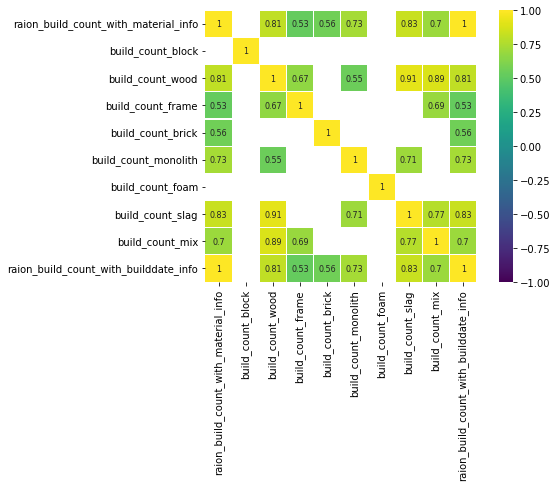

In [1933]:
corr = df_b.drop('build_count_panel', axis=1).corr() 
plt.figure(figsize=(8, 5))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Коррелируют два показателя.Удалим один из них

In [1934]:
df = df.drop(columns='raion_build_count_with_builddate_info',axis = 1)

Проверим информативность еще раз и удалим колонки, в которых индентичная информация более 80%

In [1935]:
num_rows = len(df.index)
low_information_cols = [] 
for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.8:
        low_information_cols.append(col)


In [1936]:
df = df.drop(columns = low_information_cols, axis = 1)

Теперь создадим группу с данными по типу bool

In [1937]:
df.dtypes

timestamp                                     datetime64[ns]
full_sq                                              float64
life_sq                                              float64
floor                                                float64
kitch_sq                                             float64
product_type                                           int64
area_m                                               float64
green_zone_part                                      float64
indust_part                                          float64
children_preschool                                     int64
preschool_quota                                      float64
preschool_education_centers_raion                      int64
children_school                                        int64
school_quota                                         float64
school_education_centers_raion                         int64
healthcare_centers_raion                               int64
sport_objects_raion     

In [1938]:
bins = ['preschool_quota_ismissing', 'school_quota_ismissing', 'cafe_sum_1000_min_price_avg_ismissing', 'cafe_sum_1000_max_price_avg_ismissing', 'cafe_avg_price_1000_ismissing']
df[bins] = df[bins].applymap(lambda x : 1 if x == 'yes' else 0)

# Категориальные данные.OneHot

In [1939]:
encoding_col = pd.get_dummies(df['sub_area_okrug'])
df = df.join(encoding_col).drop(['sub_area_okrug'], axis=1)

# Построение модели.

In [1949]:
df.dtypes

timestamp                                     datetime64[ns]
full_sq                                              float64
life_sq                                              float64
floor                                                float64
kitch_sq                                             float64
product_type                                           int64
area_m                                               float64
green_zone_part                                      float64
indust_part                                          float64
children_preschool                                     int64
preschool_quota                                      float64
preschool_education_centers_raion                      int64
children_school                                        int64
school_quota                                         float64
school_education_centers_raion                         int64
healthcare_centers_raion                               int64
sport_objects_raion     

Выбрала числовые, т.к. срабатывает ошибка по типу, возможно из-за даты..

In [1950]:
X_new = df.copy()
X_new =X_new[X_new.select_dtypes(include = 'number').columns]
y_new = X_new['target']


In [1951]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, shuffle=True, random_state=42)

In [1952]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [1953]:
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  
  print({'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)
  })


{'MAE train': 0.0001758175051005626, 'MAE test': 0.00031969168985511583, 'MSE train': 2.3570617189745054e-05, 'MSE test': 1.8149654739829622e-05, 'R2 train': 0.9999144272250249, 'R2 test': 0.9999343921774084}
